#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# <center><font color=7D5A16>GRIP - The Sparks Foundation</font></center>

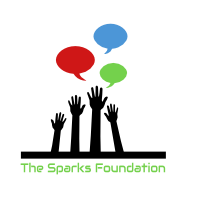

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### <center><font color=166E64>Author </font><font color=15D77D>: </font><font color=5B1746>Hrishikesh Sharad Malkar</font></center>
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# <center><font color=15D77D>Task 3 : Creating a Decision Tree Classifier and visualize it graphically.</font></center>
### <center><font color=166E64>Problem Statement: </font><font color=AB3988>For the given 'Iris' dataset, create the Decision Tree classifier and visualize it graphically. </font>
>The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

GitHub: https://bit.ly/2KY8fOd
#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 1. Importing Library

In [1]:
%matplotlib inline
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import warnings
warnings.filterwarnings('ignore')

C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 2. Reading Data

In [2]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv("../data/iris.csv", names=names)
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Shape of data
df.shape

(150, 5)

In [4]:
# for finding out null entries as well as for checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#summary
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#summary of target variable
df.describe(include=['object'])

,class
count,150
unique,3
top,Iris-setosa
freq,50


In [7]:
# categories in tareget vaiables
df['class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

In [8]:
# Skewness
df.skew()

sepal-length    0.314911
sepal-width     0.334053
petal-length   -0.274464
petal-width    -0.104997
dtype: float64

In [9]:
# Co-relation
df.corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


### 3. EDA

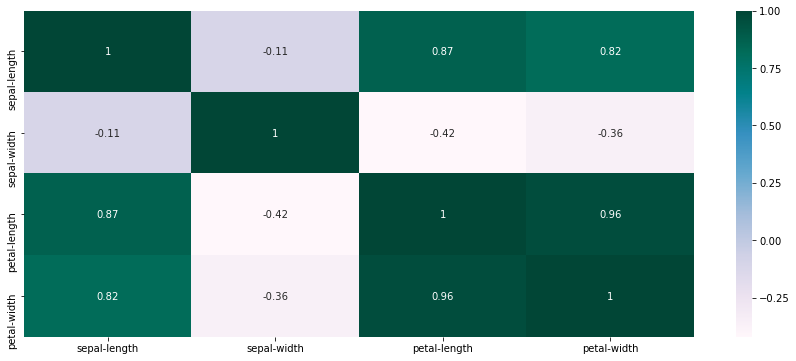

In [10]:
#heatmap
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,cmap="PuBuGn")

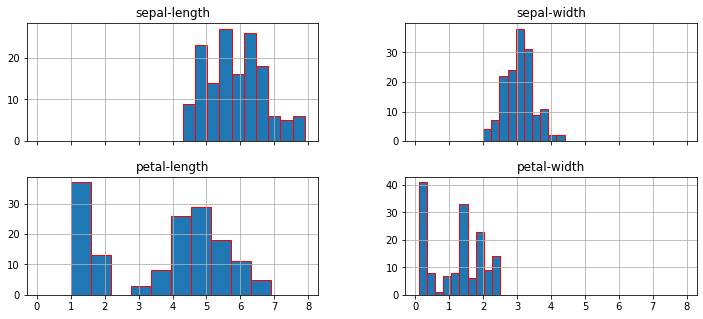

In [11]:
#Histograms
fig, ax = plt.subplots(2,2, sharex=True, figsize=(12, 5))
df.hist(edgecolor="red",figsize=(8,4),ax=ax)
plt.show()

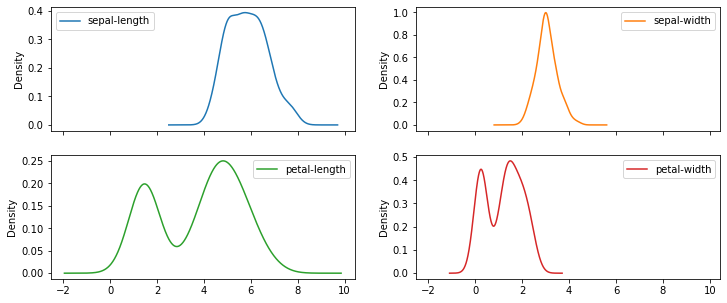

In [12]:
# Density plot
_, ax = plt.subplots(2,2, sharex=True, figsize=(12, 5))
df.plot(kind='density',ax=ax,subplots=True)
plt.show()

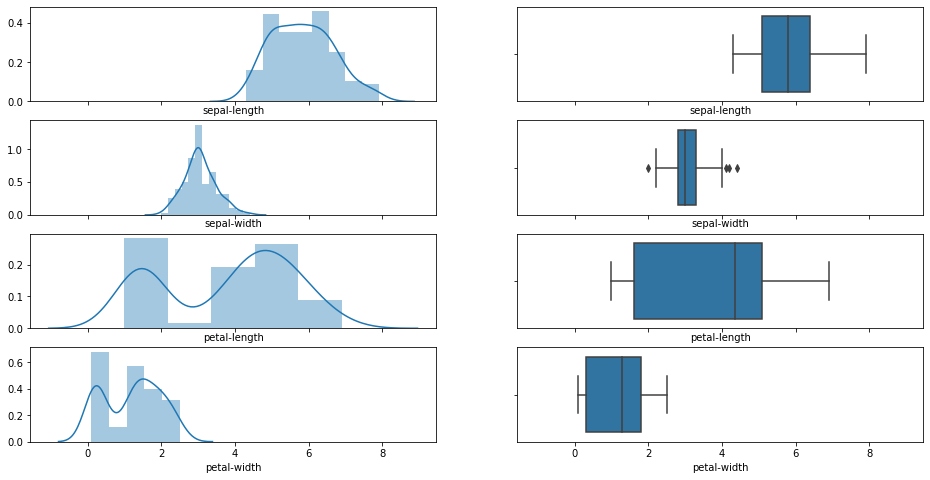

In [13]:
# distplot(sns)
_, ax = plt.subplots(4, 2, sharex=True, figsize=(16, 8))
sns.distplot(df['sepal-length'],ax=ax[0][0])
sns.boxplot(df['sepal-length'],ax=ax[0][1])
sns.distplot(df['sepal-width'],ax=ax[1][0])
sns.boxplot(df['sepal-width'],ax=ax[1][1])
sns.distplot(df['petal-length'],ax=ax[2][0])
sns.boxplot(df['petal-length'],ax=ax[2][1])
sns.distplot(df['petal-width'],ax=ax[3][0])
sns.boxplot(df['petal-width'],ax=ax[3][1])
plt.show()

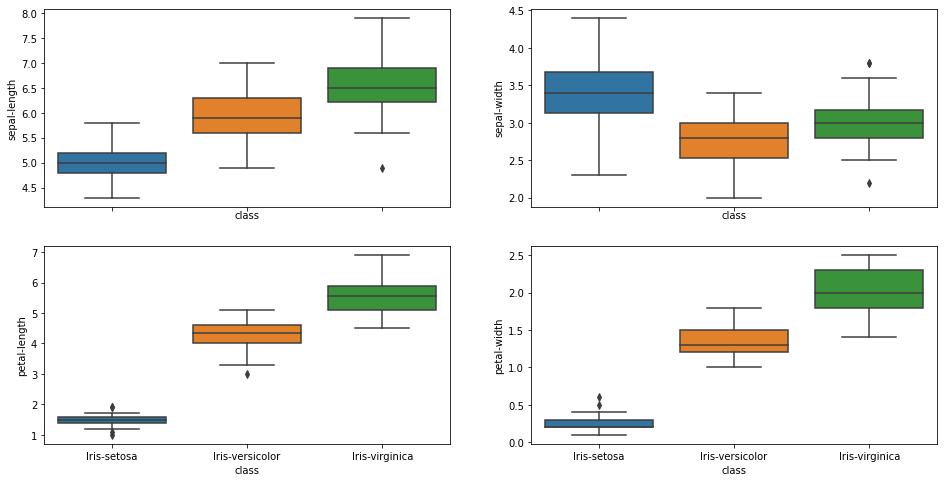

In [14]:
# Boxplot
_, ax = plt.subplots(2, 2, sharex=True, figsize=(16, 8))
sns.boxplot(x='class', y='sepal-length', data=df, ax=ax[0,0])
sns.boxplot(x='class', y='sepal-width', data=df, ax=ax[0,1])
sns.boxplot(x='class', y='petal-length', data=df, ax=ax[1,0])
sns.boxplot(x='class', y='petal-width', data=df, ax=ax[1,1])

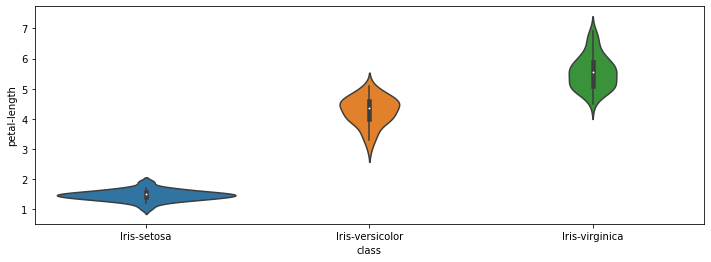

In [15]:
# violin plot
plt.figure(figsize=(12,4))
sns.violinplot(x="class",y="petal-length",data=df)
plt.show()

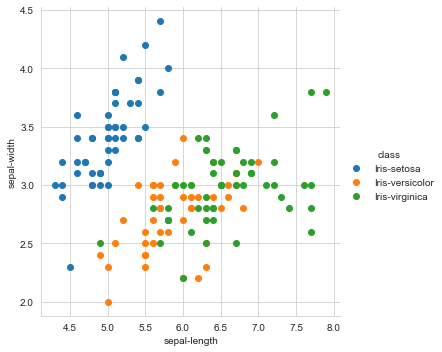

In [16]:
# scatter plot
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="class", size=5) \
   .map(plt.scatter, "sepal-length","sepal-width") \
   .add_legend();
plt.show();

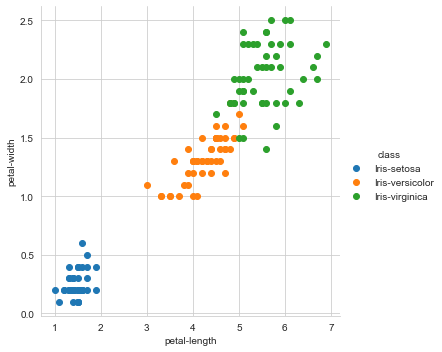

In [17]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="class", size=5) \
   .map(plt.scatter, "petal-length","petal-width") \
   .add_legend();
plt.show();

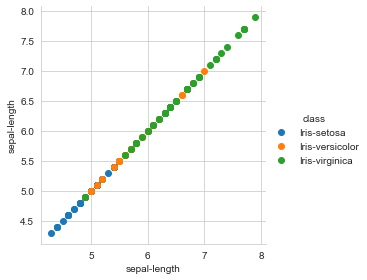

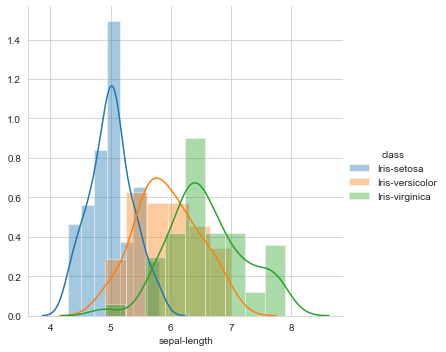

In [18]:
sns.FacetGrid(df, hue='class', size=4).\
                   map(plt.scatter, 'sepal-length',
                   'sepal-length').add_legend()

sns.FacetGrid(df, hue="class", size=5) \
   .map(sns.distplot, "sepal-length") \
   .add_legend()

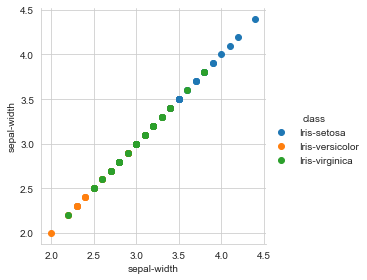

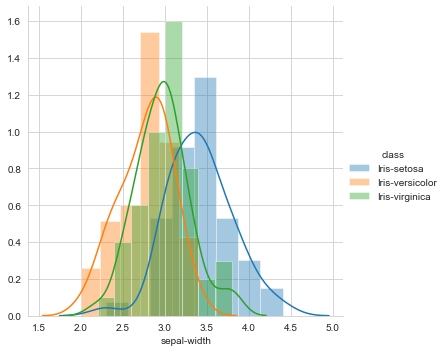

In [19]:
sns.FacetGrid(df, hue='class', size=4).\
                   map(plt.scatter, 'sepal-width',
                   'sepal-width').add_legend()

sns.FacetGrid(df, hue="class", size=5) \
   .map(sns.distplot, "sepal-width") \
   .add_legend()

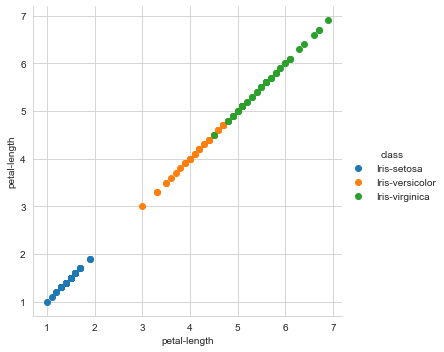

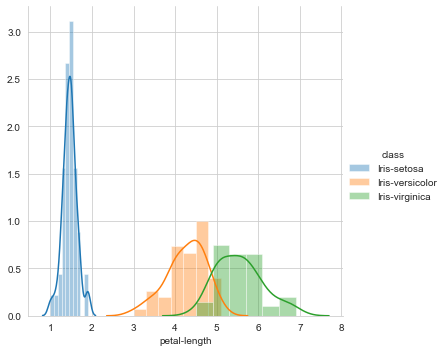

In [20]:
sns.FacetGrid(df, hue='class', size=5).\
                   map(plt.scatter, 'petal-length',
                   'petal-length').add_legend()

sns.FacetGrid(df, hue="class", size=5) \
   .map(sns.distplot, "petal-length") \
   .add_legend();

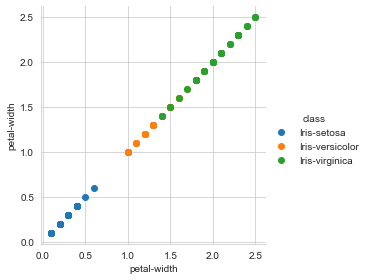

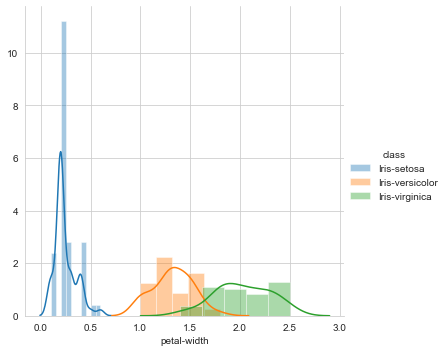

In [21]:
sns.FacetGrid(df, hue='class', size=4).\
                   map(plt.scatter, 'petal-width',
                   'petal-width').add_legend()

sns.FacetGrid(df, hue="class", size=5) \
   .map(sns.distplot, "petal-width") \
   .add_legend();

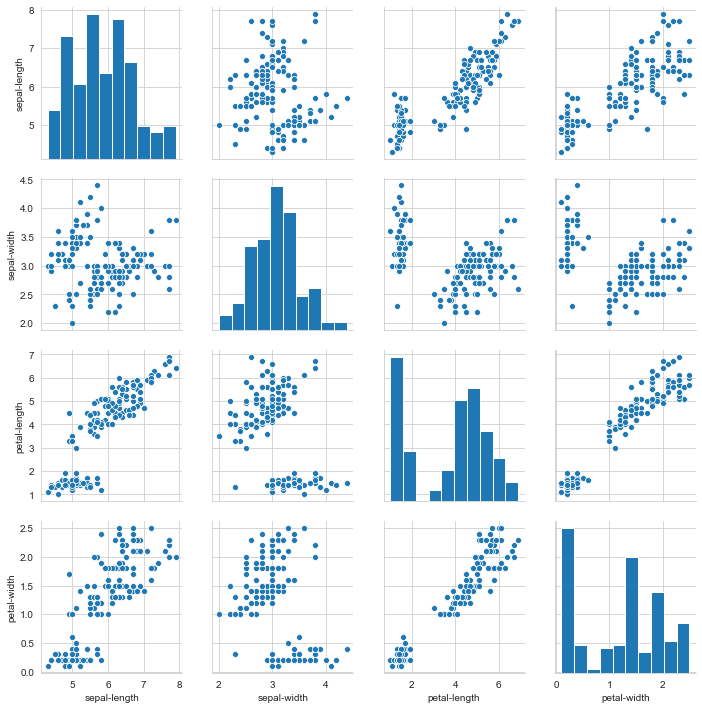

In [22]:
#pairplot
sns.pairplot(df)

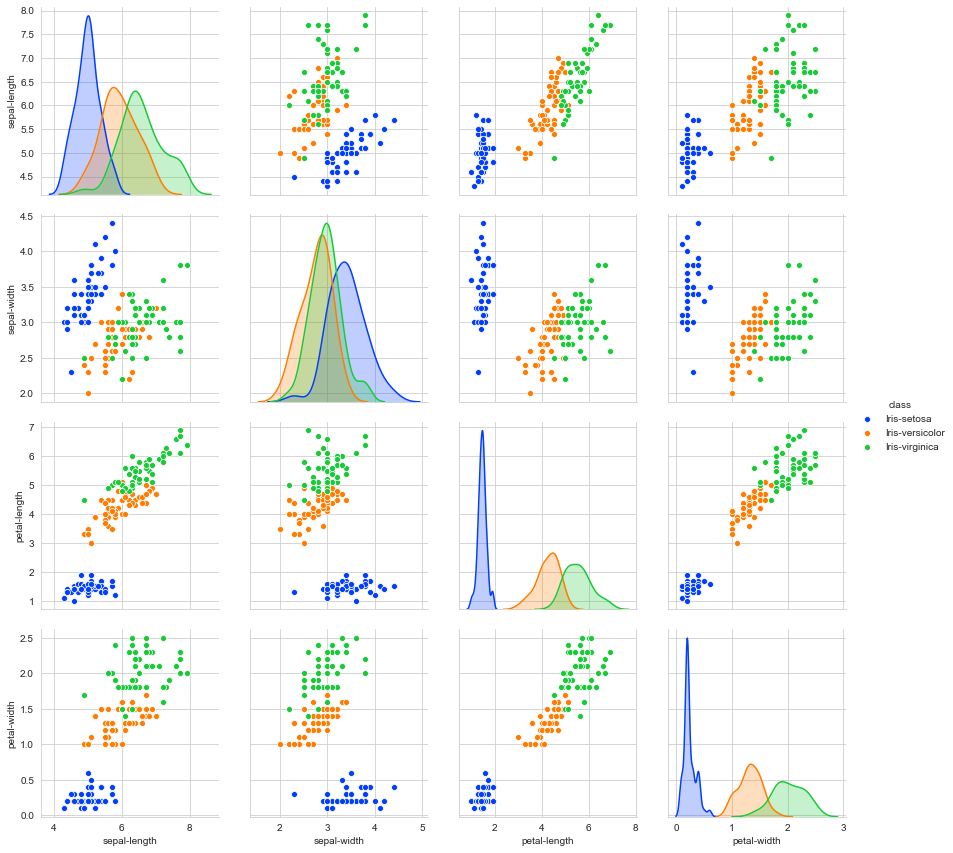

In [23]:
sns.pairplot(df,hue="class",palette="bright",diag_kind="auto",size=3)

> **We can easily observe that "iris-setosa" makes a distinctive cluster in every parameter. while the other two pieces are overlapping a bit on each other.**

### 4. Data Preparation

In [24]:
X = df.drop('class',axis=1)
y = df['class']

In [25]:
X.shape,y.shape

((150, 4), (150,))

### 5. Train Test Split

>**Spliiting data in [75% - 25%] format**

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [108]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [109]:
X_test.shape, y_test.shape

((38, 4), (38,))

### 6. Model Building

In [110]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score
ds_tree=DecisionTreeClassifier(criterion = "entropy")
ds_tree.fit(X_train,y_train)
pred=ds_tree.predict(X_test)

In [111]:
print('accuracy_score: ',accuracy_score(y_test,pred))
print('confusion_matrix:\n',confusion_matrix(y_test,pred))

accuracy_score:  0.9736842105263158
confusion_matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


### 7. Comparison of actual v/s predicted output

In [112]:
X_test['Expected_outcome']=y_test
X_test['Predicted_outcome']=pred
X_test

,sepal-length,sepal-width,petal-length,petal-width,Expected_outcome,Predicted_outcome
114,5.8,2.8,5.1,2.4,Iris-virginica,Iris-virginica
62,6.0,2.2,4.0,1.0,Iris-versicolor,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa
100,6.3,3.3,6.0,2.5,Iris-virginica,Iris-virginica
40,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa
86,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor,Iris-versicolor


### 8. Model Evaluation

In [61]:
from sklearn.metrics import classification_report
print("Accuracy of the model is", accuracy_score(pred, y_test))
print('Classification Report\n')
print(classification_report(y_test,pred))

Accuracy of the model is 0.9736842105263158
Classification Report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



### 9. Decision Tree

In [63]:
names1 = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']

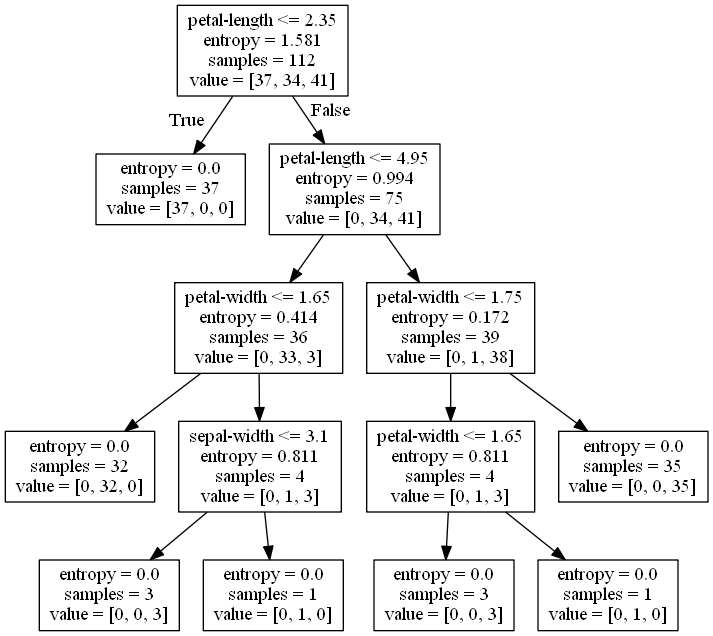

In [64]:
from pydot import graph_from_dot_data
dot_data = StringIO()
export_graphviz(ds_tree, out_file=dot_data, feature_names=names1)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

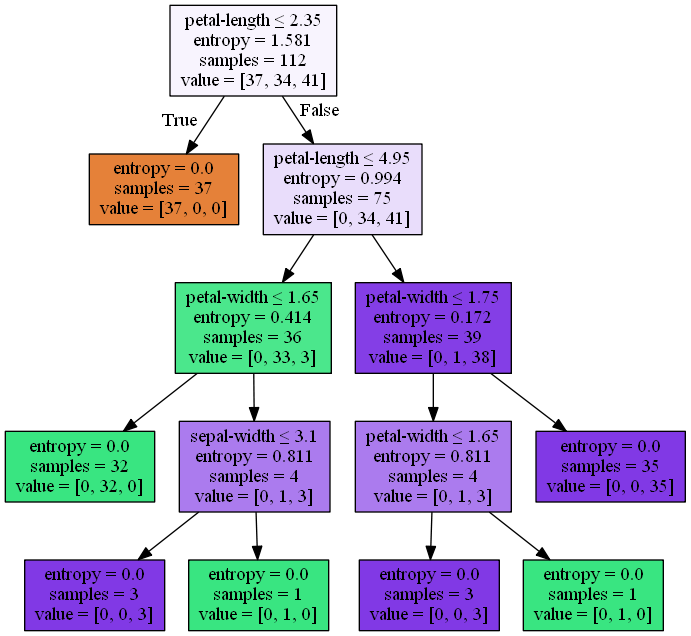

In [65]:
dot_data = StringIO()
export_graphviz(ds_tree, out_file=dot_data, feature_names=names1, filled=True, rounded=False,special_characters=True)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### 10. Feature Importance

In [87]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(ds_tree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
3,petal-width,0.645
2,petal-length,0.318
0,sepal-length,0.018
1,sepal-width,0.018


### 11. Train Test Split - 2

>**Spliiting data in [80% - 20%] format**


In [115]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.20, random_state=0)

In [116]:
X_train1.shape, y_train1.shape

((120, 4), (120,))

In [117]:
X_test1.shape, y_test1.shape

((30, 4), (30,))

### 12. Model Building -2

In [118]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score
ds_tree1=DecisionTreeClassifier(criterion = "entropy")
ds_tree1.fit(X_train1,y_train1)
pred1=ds_tree.predict(X_test1)

In [119]:
print('accuracy_score: ',accuracy_score(y_test1,pred1))
print('confusion_matrix:\n',confusion_matrix(y_test1,pred1))

accuracy_score:  1.0
confusion_matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


### 13. Comparison of actual v/s predicted output -2

In [120]:
X_test1['Expected_outcome']=y_test1
X_test1['Predicted_outcome']=pred1
X_test1

,sepal-length,sepal-width,petal-length,petal-width,Expected_outcome,Predicted_outcome
114,5.8,2.8,5.1,2.4,Iris-virginica,Iris-virginica
62,6.0,2.2,4.0,1.0,Iris-versicolor,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa
100,6.3,3.3,6.0,2.5,Iris-virginica,Iris-virginica
40,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa
86,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor,Iris-versicolor


### 14. Model Evaluation -2

In [76]:
from sklearn.metrics import classification_report
print("Accuracy of the model is", accuracy_score(pred1, y_test1))
print('Classification Report\n')
print(classification_report(y_test1,pred1))

Accuracy of the model is 1.0
Classification Report

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### 15. Decision Tree - 2

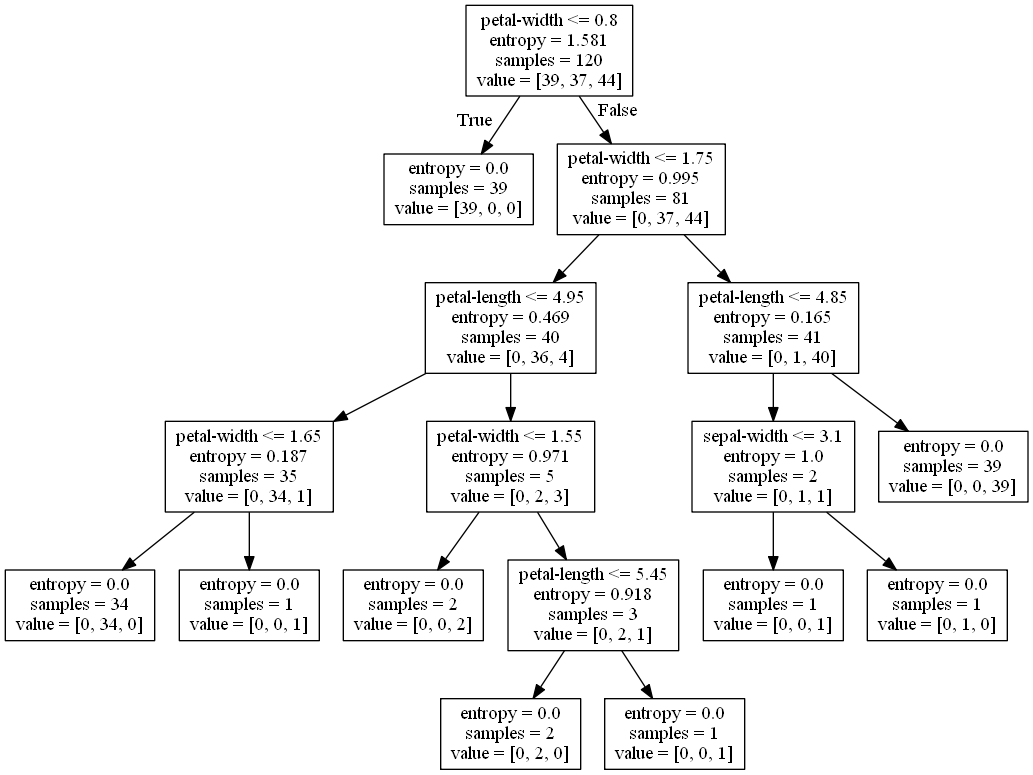

In [77]:
from pydot import graph_from_dot_data
dot_data = StringIO()
export_graphviz(ds_tree1, out_file=dot_data, feature_names=names1)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

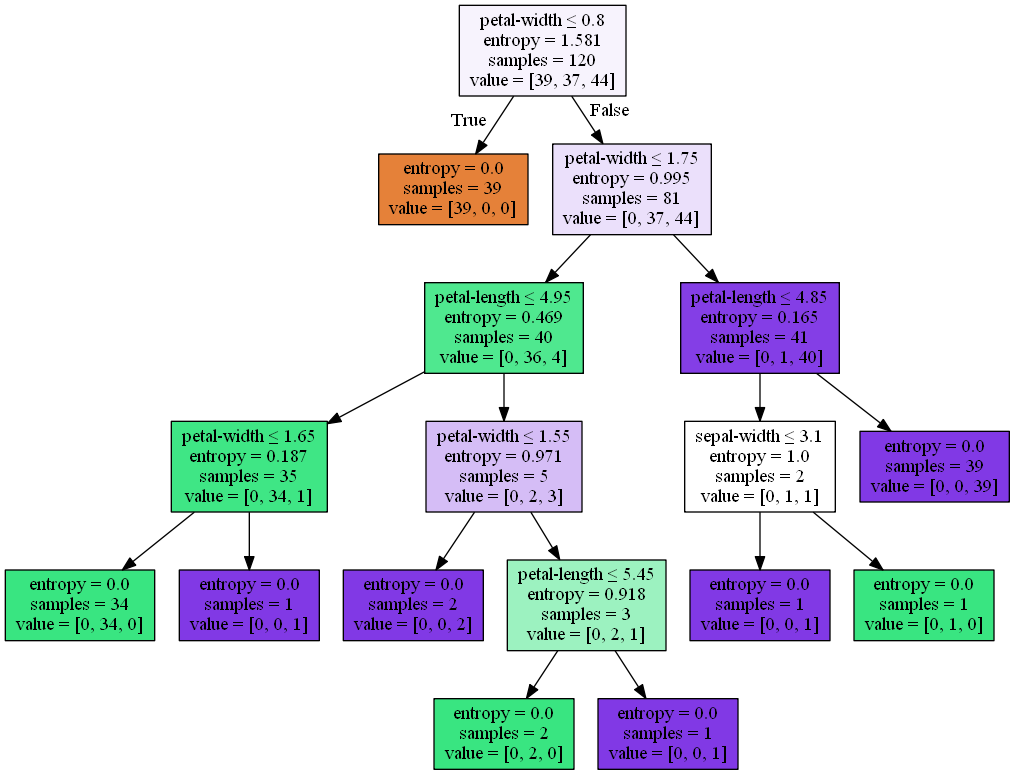

In [78]:
dot_data = StringIO()
export_graphviz(ds_tree1, out_file=dot_data, feature_names=names1, filled=True, rounded=False,special_characters=True)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### 16. Feature Importance - 2

In [86]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(ds_tree1.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
3,petal-width,0.911
2,petal-length,0.078
1,sepal-width,0.011
0,sepal-length,0.000


### Conclusion
> I was successfully able to carry-out prediction on iris dataset using Decision Tree Algorithm and created Decision Tree Classifier and was able to evaluate the model's accuracy score.

### THANKS :)